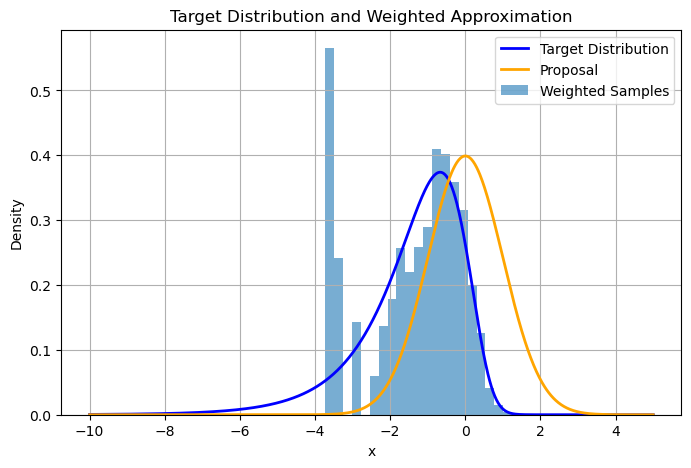

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def johnsson(x):
    p = np.sqrt(2)/np.sqrt(np.pi * (1 + (x - 1) ** 2)) * np.exp(-.5 * (3 + 2 * np.arcsinh(x - 1)) **2)
    return p

def gaussian(x,mu,std):
    p = 1/(std*np.sqrt(2*np.pi)) * np.exp((-(x-mu)**2/(2*std**2)))
    return p                               

L = 1000
x = np.linspace(-10, 5, L)
mean = 0
var = 1
samples = np.random.normal(mean, np.sqrt(var), L)
prop = gaussian(samples, mean, np.sqrt(var))
approx = johnsson(samples)
weights = approx / prop
target = johnsson(x)
proposal = gaussian(x, mean, np.sqrt(var))

# Plot
plt.figure(figsize=(8, 5))


plt.plot(x, target, label="Target Distribution", color="blue", lw=2)
plt.plot(x, proposal, label="Proposal", color="orange", lw=2)
# Plot weighted histogram (use normalized weights)
plt.hist(samples, bins=30, density=True, weights=weights, alpha=0.6, label="Weighted Samples")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Target Distribution and Weighted Approximation")
plt.legend()
plt.grid(True)
plt.show()


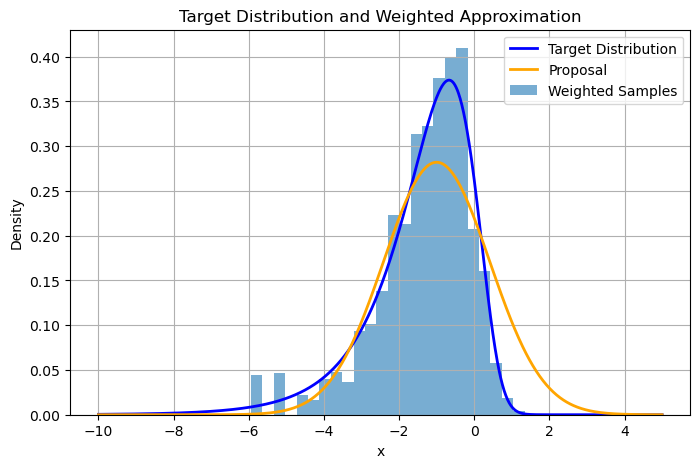

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def johnsson(x):
    p = np.sqrt(2)/np.sqrt(np.pi * (1 + (x - 1) ** 2)) * np.exp(-.5 * (3 + 2 * np.arcsinh(x - 1)) **2)
    return p

def gaussian(x,mu,std):
    p = 1/(std*np.sqrt(2*np.pi)) * np.exp((-(x-mu)**2/(2*std**2)))
    return p                               

L = 1000
x = np.linspace(-10, 5, L)
mean = -1
var = 2
samples = np.random.normal(mean, np.sqrt(var), L)
prop = gaussian(samples, mean, np.sqrt(var))
approx = johnsson(samples)
weights = approx / prop
target = johnsson(x)
proposal = gaussian(x, mean, np.sqrt(var))

# Plot
plt.figure(figsize=(8, 5))


plt.plot(x, target, label="Target Distribution", color="blue", lw=2)
plt.plot(x, proposal, label="Proposal", color="orange", lw=2)
# Plot weighted histogram (use normalized weights)
plt.hist(samples, bins=30, density=True, weights=weights, alpha=0.6, label="Weighted Samples")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Target Distribution and Weighted Approximation")
plt.legend()
plt.grid(True)
plt.show()


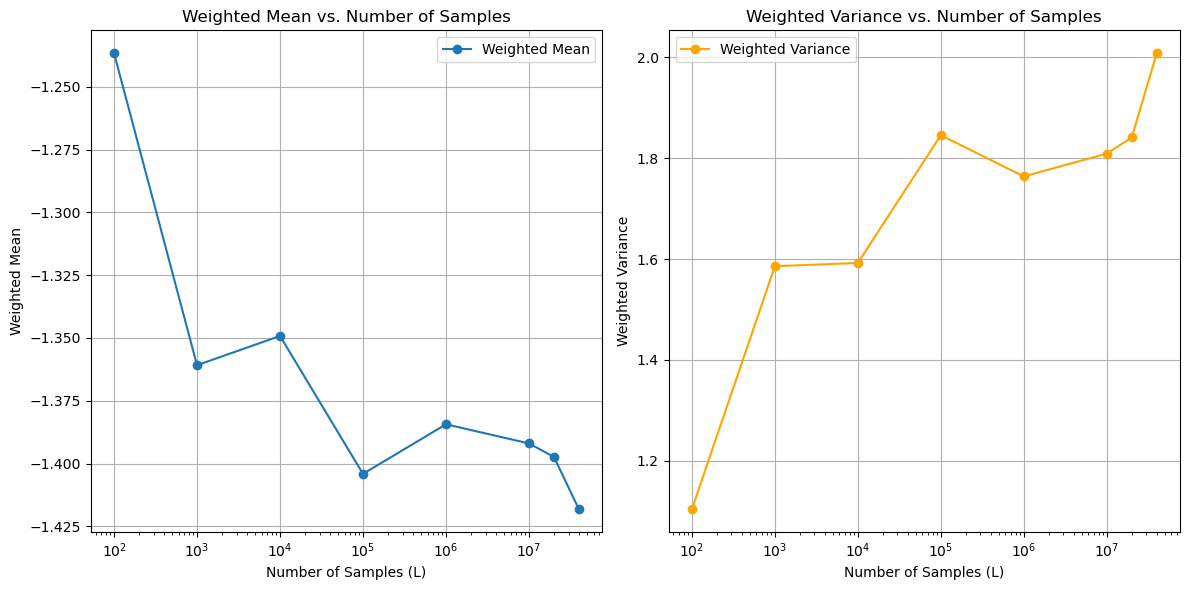

In [17]:
L_list = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 2*10**7, 4*10**7]
mean_list = []
var_list = []
for L in L_list:
    x = np.linspace(-10, 5, L)
    mean = -1
    var = 2
    samples = np.random.normal(mean, np.sqrt(var), L)
    prop = gaussian(samples, mean, np.sqrt(var))
    approx = johnsson(samples)
    weights = approx / prop
    target = johnsson(x)
    proposal = gaussian(x, mean, np.sqrt(var))

    weighted_mean = np.sum(weights * samples) / np.sum(weights)
    weighted_variance = np.sum(weights * (samples - weighted_mean)**2) / np.sum(weights)

    mean_list.append(weighted_mean)
    var_list.append(weighted_variance)

    #print('L = ', L)
    #print(f"Weighted Mean: {weighted_mean}")
    #print(f"Weighted Variance: {weighted_variance}")

# Plot mean and variance against L
plt.figure(figsize=(12, 6))

# Plot weighted mean
plt.subplot(1, 2, 1)
plt.plot(L_list, mean_list, marker="o", label="Weighted Mean")
plt.xscale("log")
plt.xlabel("Number of Samples (L)")
plt.ylabel("Weighted Mean")
plt.title("Weighted Mean vs. Number of Samples")
plt.grid(True)
plt.legend()

# Plot weighted variance
plt.subplot(1, 2, 2)
plt.plot(L_list, var_list, marker="o", color="orange", label="Weighted Variance")
plt.xscale("log")
plt.xlabel("Number of Samples (L)")
plt.ylabel("Weighted Variance")
plt.title("Weighted Variance vs. Number of Samples")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

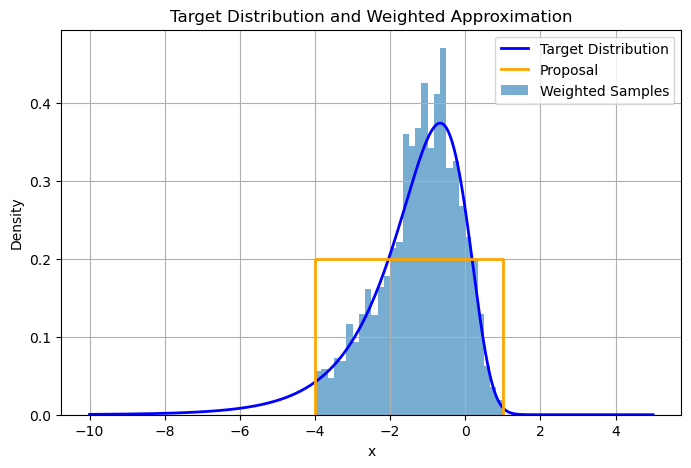

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def johnsson(x):
    p = np.sqrt(2)/np.sqrt(np.pi * (1 + (x - 1) ** 2)) * np.exp(-.5 * (3 + 2 * np.arcsinh(x - 1)) **2)
    return p

def gaussian(x,mu,std):
    p = 1/(std*np.sqrt(2*np.pi)) * np.exp((-(x-mu)**2/(2*std**2)))
    return p                               

L = 1000
x = np.linspace(-10, 5, L)
mean = 0
var = 1
samples = np.random.uniform(-4, 1, L)
prop = np.full_like(samples,1/ (1 - (-4))) 
approx = johnsson(samples)
weights = approx / prop
target = johnsson(x)
# Plot
plt.figure(figsize=(8, 5))


plt.plot(x, target, label="Target Distribution", color="blue", lw=2)
#plt.plot(x, prop, label="Proposal", color="orange", lw=2)
x_values = x[(x < 1) & (x > -4)]
x = [-4, -4, 1, 1]
prop_fixed = [0, prop[0], prop[0], 0]
plt.plot(x, prop_fixed,  label = 'Proposal', color="orange", lw=2)
# Plot weighted histogram (use normalized weights)
plt.hist(samples, bins=30, density=True, weights=weights, alpha=0.6, label="Weighted Samples")
# Add labels and legend
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Target Distribution and Weighted Approximation")
plt.legend()
plt.grid(True)
plt.show()
